# Store Sales Prediction

### Problem Statement
#### The data scientists at Store have collected sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

### Statement Analysis
* Supervised Machine Learning Problem.
* The Target Value is **Item_Outlet_Sales.**

### Goal
**Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.**


This dataset is named BigMart Sales. The dataset contains a set of 8,523 records under 12 attributes:

Column Name and their                          Description
* **Item_Identifier:**                Unique product ID
* **Item_Weight	:**                    Weight of product
* **Item_Fat_Content	:**   Checks the Concentration of fat in the product
* **Item_Visibility	:**   The % of total display area of all similar products in a store
* **Item_Type:**    Category
* **Item_MRP	 :**          Maximum Retail Price for a Product
* **Outlet_Identifier	:**   Store ID
* **Outlet_Establishment_Year	:**The year in which store was established
* **Outlet_Size	:**The size of the store (Area Size Category)
* **Outlet_Location_Type	:**In Terms of city Tiers (Size)
* **Outlet_Type	:**Grocery store or a type of supermarket
* **Item_Outlet_Sales	:** Sales of the product In the Specific outlet

# ***Libraries***

In [65]:
import numpy as np    #linear algebra
import pandas as pd   #data preprocessing
import warnings  # warning filter
import matplotlib.pyplot as plt   #Data Visualization
import seaborn as sns   #Data Visualization
%matplotlib inline
import pickle

# from pandas_profiling import ProfileReport

#train test split
from sklearn.model_selection import train_test_split

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#metrics
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection  import cross_val_score

#ML models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import xgboost as xgb

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#warning hadle
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [66]:
#Reading training datasets
train = pd.read_csv(r"E:\Data science material\Project for machine learning\Store_Sales_Prediction\train (2).csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [67]:
# Reading testing datasets
test = pd.read_csv(r"E:\Data science material\Project for machine learning\Store_Sales_Prediction\test (1).csv")
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [68]:
# Rows and Columns
print(f"Training Dataset (row,col): {train.shape}\n\nTesting Datasets(row,col): {test.shape}")

Training Dataset (row,col): (8523, 12)

Testing Datasets(row,col): (5681, 11)


In [69]:
# train.isnull().sum()/train.shape[0]*100

In [70]:
# test.isnull().sum()/test.shape[0]*100

# ***Preprocessing***

#### Lets Combine Both Datasets since both are Similar

In [71]:
# For identifing in later the data of train and test set I make a new column source

train['source'] = 'train'
# train.info()
# train['source']
test['source'] = 'test'

In [72]:
data = pd.concat([train, test], ignore_index=True)
print(f'After Combining Datasets: {data.shape}')

After Combining Datasets: (14204, 13)


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [74]:
# Summary of Dataset Train
data.describe(include=[object, np.number])

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
count,14204,11765.000000,14204,14204.000000,14204,14204.000000,14204,14204.000000,10188,14204,14204,8523.000000,14204
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN,2
top,FDU15,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN,train
freq,10,NaN,8485,NaN,2013,NaN,1559,NaN,4655,5583,9294,NaN,8523
mean,NaN,12.792854,NaN,0.065953,NaN,141.004977,NaN,1997.830681,NaN,NaN,NaN,2181.288914,NaN
std,NaN,4.652502,NaN,0.051459,NaN,62.086938,NaN,8.371664,NaN,NaN,NaN,1706.499616,NaN
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000,NaN
25%,NaN,8.710000,NaN,0.027036,NaN,94.012000,NaN,1987.000000,NaN,NaN,NaN,834.247400,NaN
50%,NaN,12.600000,NaN,0.054021,NaN,142.247000,NaN,1999.000000,NaN,NaN,NaN,1794.331000,NaN
75%,NaN,16.750000,NaN,0.094037,NaN,185.855600,NaN,2004.000000,NaN,NaN,NaN,3101.296400,NaN


# ***Data Exploration***

Below are the steps involved to understand, clean and prepare my data for building my predictive model:

* Missing values treatment
* Variable Identification
* Univariate Analysis
* Bi-variate Analysis
* Outlier treatment
* Variable transformation
* Variable creation

In [75]:
# Lets check missing Values
data.isnull().sum()/data.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.171219
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.273726
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
source                        0.000000
dtype: float64

In [76]:
# Lets check and imputate missing values
print('Missing Values in Outlet_Size :\n',data['Outlet_Size'].value_counts())
print('\nMissing Values in Item_Weight :\n',data.Item_Weight.value_counts())

Missing Values in Outlet_Size :
 Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Missing Values in Item_Weight :
 17.600    135
12.150    127
10.500    123
13.650    115
11.800    113
         ... 
7.640       7
5.905       7
7.850       6
4.615       6
9.035       6
Name: Item_Weight, Length: 415, dtype: int64


'OutLet_Size' is a catogerial column, we can use 'mode' to fill the values.

In [77]:
# Filling Outlet Size  missing values.
# data['Outlet_Size'] = data.Outlet_Size.fillna(data.Outlet_Size.dropna().mode()[0])
# # Checking if we filled all values
# print( 'Missing values after filling:' ,data.Outlet_Size.isnull().sum())

print('Missing Values in Item_Weight: ', data.Outlet_Size.isnull().sum())
# print(data['Outlet_Size'].mode())
# data['Outlet_Size'].fillna(value =data['Outlet_Size'].mode(), inplace =True)
miss_values = data.Outlet_Size.isnull()
O_Size_avg = data.pivot_table(values='Outlet_Size', index='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
data.loc[miss_values, 'Outlet_Size'] = data.loc[miss_values, 'Outlet_Type'].apply(lambda x:O_Size_avg.loc[x])
print('Missing values after filling: ' , sum(data['Outlet_Size'].isnull()))

Missing Values in Item_Weight:  4016
Missing values after filling:  0


Text(0.5, 1.0, 'Item Wieght Distribution')

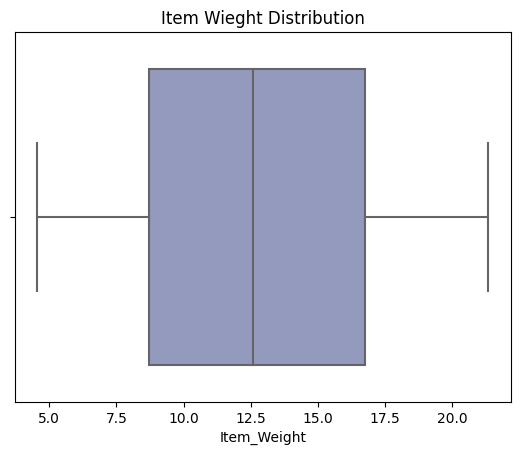

In [78]:
sns.boxplot(x=data['Item_Weight'], palette='BuPu')
plt.title('Item Wieght Distribution')

No 'Outliers' in **Item_wieght**, So we can replace 'missing values' with its mean

In [79]:
# imputate missing values in item weight
print('Missing Values in Item_Weight: ', data.Item_Weight.isnull().sum())
data.Item_Weight.fillna(value= data['Item_Weight'].mean(), inplace=True)
# miss_values = data.Item_Weight.isnull()
# item_wt_avg = data.pivot_table(values='Item_Weight', index ='Item_Identifier')
# data.loc[miss_values, 'Item_Weight'] = data.loc[miss_values, 'Item_Identifier'].apply(lambda x:item_wt_avg.loc[x])
print('Missing values after filling: ' , sum(data['Item_Weight'].isnull()))

Missing Values in Item_Weight:  2439
Missing values after filling:  0


In [80]:
# check info for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [81]:
# data1 = data.drop(["Item_Identifier", "Outlet_Identifier"], axis=1)
# Data_Profile = ProfileReport(data1)
# Data_Profile

* ###  Veriable Identication

In [82]:
# Numericals
num_df = data.select_dtypes('number')
# Categorial 
cat_df = data.select_dtypes('object')

In [83]:
# Lets Deal with catgorial Data First     
for col in cat_df.columns:
    if(col != 'Item_Identifier'):
        print('\nFrequency of Categories for varible %s'%col)
        print('\nTotal Categories: ', len(cat_df[col].value_counts()), '\n', cat_df[col].value_counts())
        


Frequency of Categories for varible Item_Fat_Content

Total Categories:  5 
 Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type

Total Categories:  16 
 Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Identifier

Total Categories:  10 
 OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019  

In [84]:
# Replace reapted values in Item_Fat_Content
data['Item_Fat_Content'] = data.Item_Fat_Content.replace(['LF', 'low fat', 'reg'],
                                                              ['Low Fat','Low Fat', 'Regular'])
data.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [85]:
# Combine Item_Type, and create new category
data['Item_Type_Combined'] = data.Item_Identifier.apply(lambda x:x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].replace(['FD','DR','NC'],
                                                                   ['Food','Drinks', 'Non-Consumable']) 
data.Item_Type_Combined.value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [86]:
data.pivot_table(values='Item_Outlet_Sales', index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


There is a huge difference in sales, so not good idea to combine them

In [87]:
# Lets deal with Numerical Data
num_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.234226,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.027036,94.012000,1987.000000,834.247400
50%,12.792854,0.054021,142.247000,1999.000000,1794.331000
75%,16.000000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


* **Item_Visibility**: it has min **0** value, which makes no sense
* **Outlet_Establishment_Year**: Its better to address how old store is

* ###  Outliers

Text(0.5, 1.0, 'Item Outlet Sales Distribution')

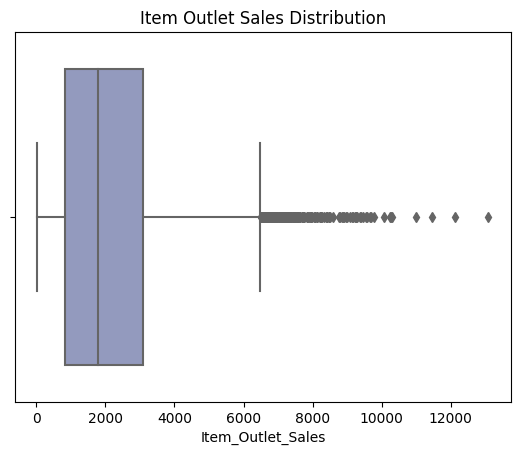

In [88]:
#Box plot for Item_Outlet_Sales to see outliers
sns.boxplot(x=data['Item_Outlet_Sales'], palette='BuPu')
plt.title('Item Outlet Sales Distribution')

In [89]:
# Removing Outliers
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(data, "Item_Outlet_Sales")
print("Upper whisker: ",upper)
print("Lower Whisker: ",lower)
data = data[(data['Item_Outlet_Sales'] > lower) & (data['Item_Outlet_Sales'] < upper)]

Upper whisker:  6501.8699
Lower Whisker:  -2566.3261


Text(0.5, 1.0, 'Item Outlet Sales Distribution after removing outliers')

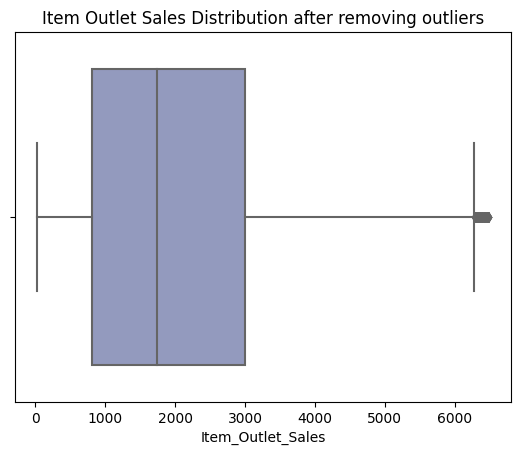

In [90]:
# Item_Outlet_Sales after removing Outliers
sns.boxplot(x=data['Item_Outlet_Sales'], palette='BuPu')
plt.title('Item Outlet Sales Distribution after removing outliers')

In [91]:
# change Establishment_Year to Outlet_Age
data['Oultet_Age'] = 2013 - data['Outlet_Establishment_Year']

In [92]:
# Lets consider 0 as missing value in Item_visibility
print('Missing Values in Item_Visibility: ', len(data[num_df['Item_Visibility'] == 0]))
miss_values = (data['Item_Visibility'] == 0)
item_vis_avg = data.pivot_table(values='Item_Visibility', index ='Item_Identifier')

data.loc[miss_values, 'Item_Visibility'] = data.loc[miss_values, 'Item_Identifier'].apply(lambda x:item_vis_avg.loc[x])
print('Missing values after filling: ' , sum(data['Item_Visibility'].isnull()))

Missing Values in Item_Visibility:  512
Missing values after filling:  0


In [93]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Oultet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food,14
3,FDX07,19.20,Regular,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,Food,15
4,NCD19,8.93,Low Fat,0.008082,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,Non-Consumable,26


# ***Data Visualization***

* #### Univariate Plots
lets look at the countplots for categorial data

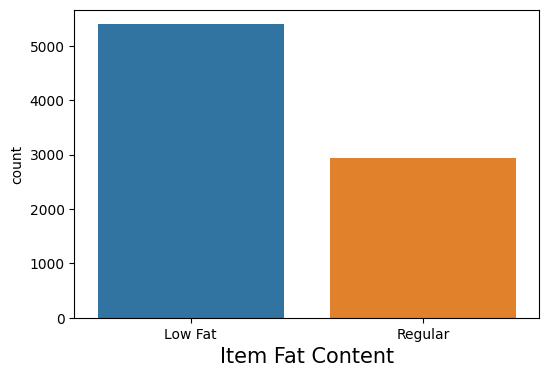

In [94]:
# Categorial Data
['Item_Identifier', 'Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Size',
'Outlet_Location_Type', 'Outlet_Type', 'Item_Type', 'Item_Type_Combined' ]

# CountPlot for Item_Fat_Content
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Item_Fat_Content')
plt.xlabel('Item Fat Content', fontsize=15)
plt.show()

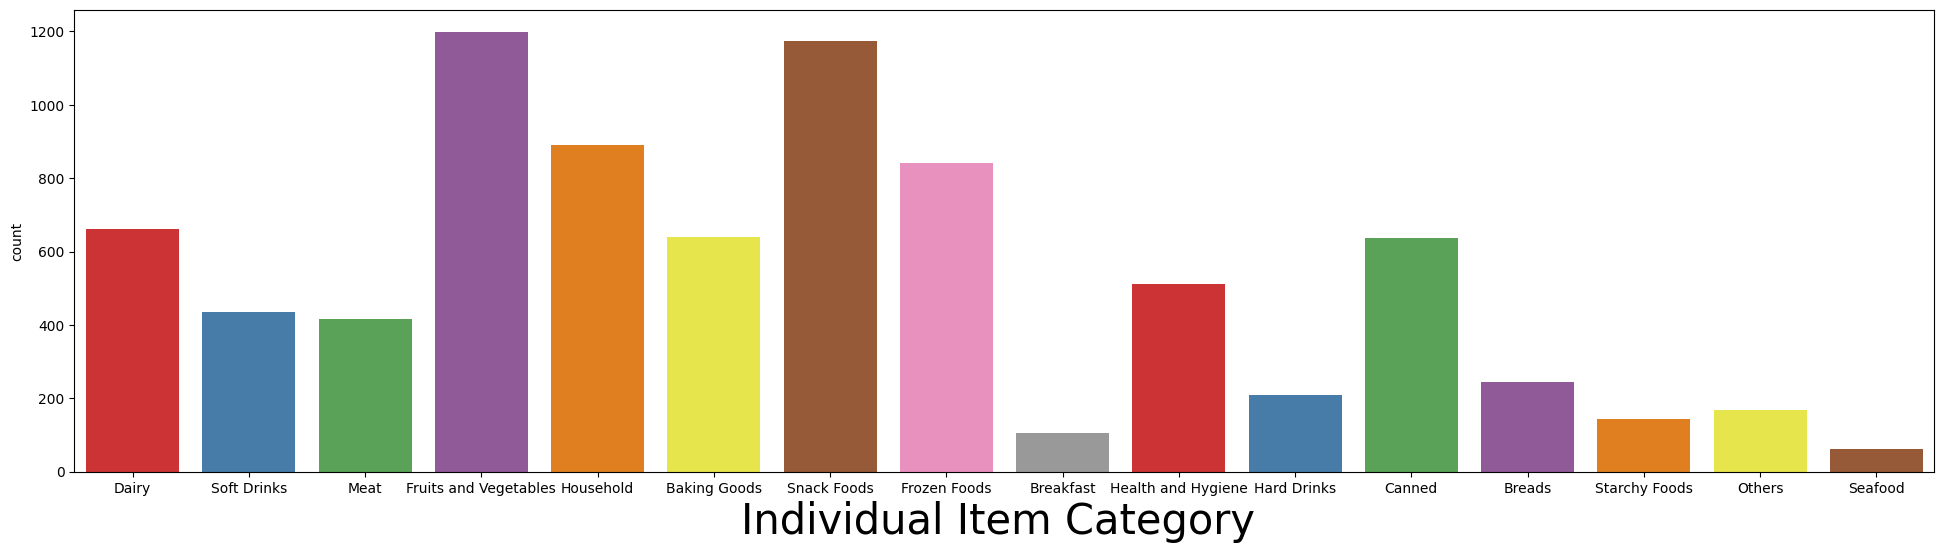

In [95]:
# CountPlot for Individual Item Category
plt.figure(figsize=(24,6))
sns.countplot(data=data, x='Item_Type',  palette='Set1')
plt.xlabel('Individual Item Category ', fontsize=30)
plt.show()

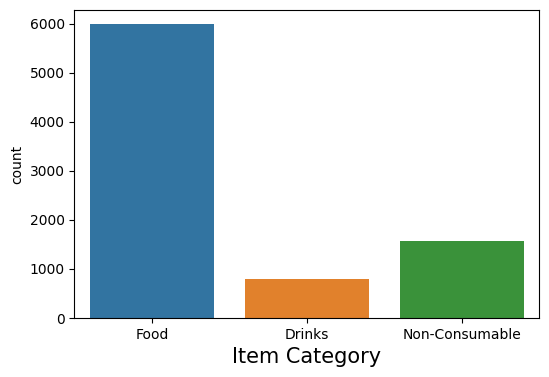

In [96]:
#  CountPlot for Item_Type_Combined
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Item_Type_Combined')
plt.xlabel('Item Category', fontsize=15)
plt.show()

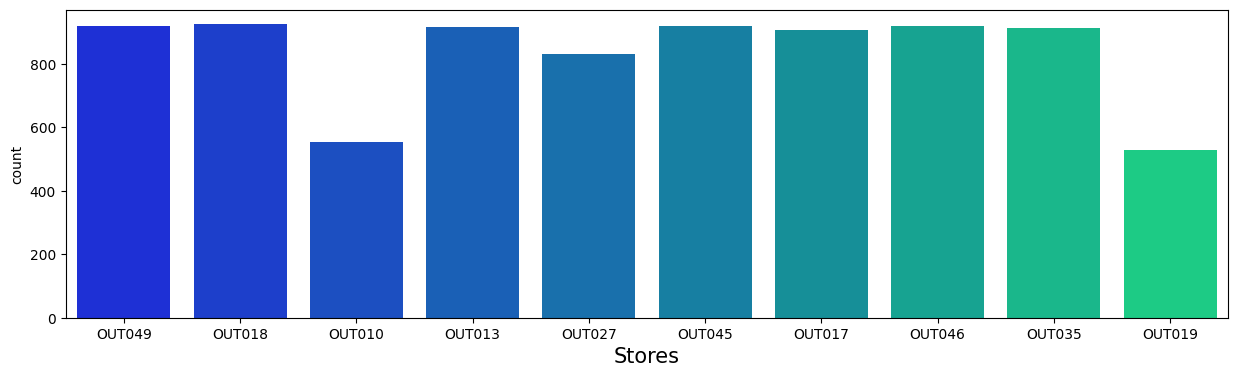

In [97]:
# CountPlot for Outlet_Identifier
plt.figure(figsize=(15,4))
sns.countplot(data=data, x='Outlet_Identifier', palette='winter')
plt.xlabel('Stores', fontsize=15)
plt.show()

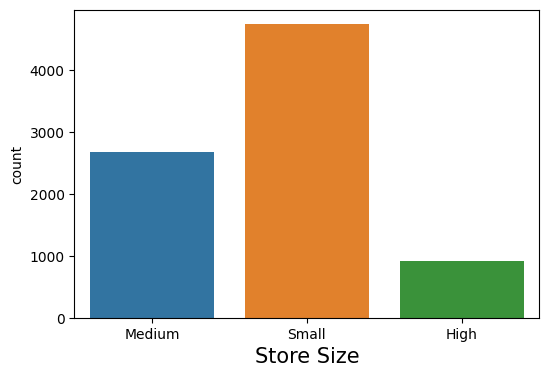

In [98]:
# CountPlot for Outlet_Size
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Outlet_Size')
plt.xlabel('Store Size', fontsize=15)
plt.show()

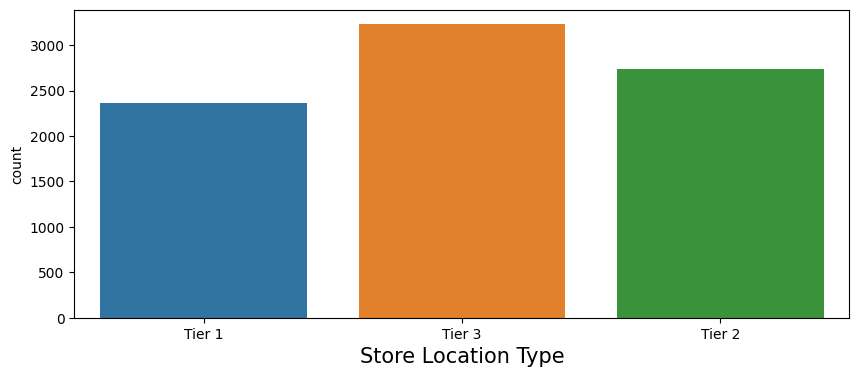

In [99]:
# CountPlot for Outlet_Location_Type
plt.figure(figsize=(10,4))
sns.countplot(data=data, x='Outlet_Location_Type')
plt.xlabel('Store Location Type', fontsize=15)
plt.show()

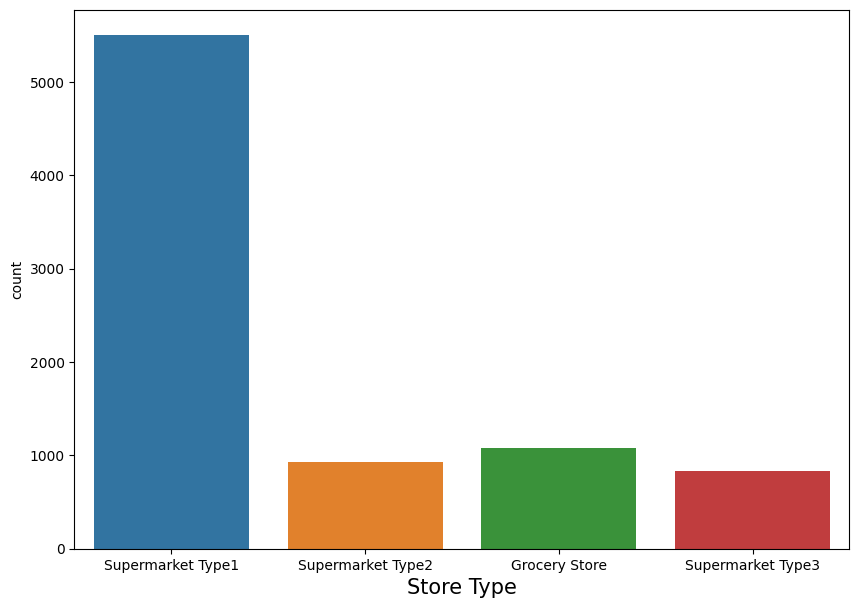

In [100]:
# CountPlot for Outlet_Type
plt.figure(figsize=(10,7))
sns.countplot(data=data, x='Outlet_Type')
plt.xlabel('Store Type', fontsize=15)
plt.show()

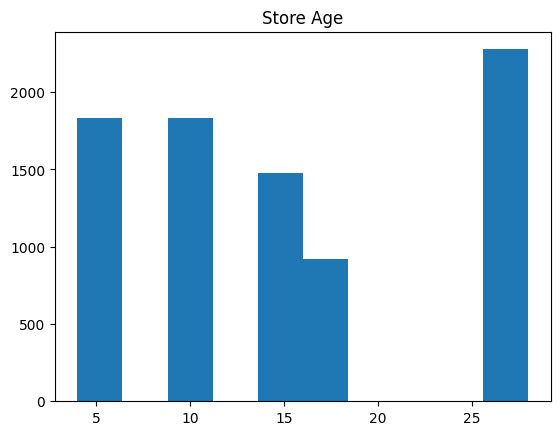

In [101]:
# For Numerical Data

# HistPlot for Outlet_Age
plt.hist(x=data['Oultet_Age'], )
plt.title('Store Age')
plt.show()

#### Realizations
* **Outlet_Age**: Most Common **Outlets** are 35 year's old.

* ### Bivariate plots For Numeric.
> Let's check following relationships
* **Sales per Item_MRP**
* **Sales per Item_Visibility**
* **Sales per Item_Weight**

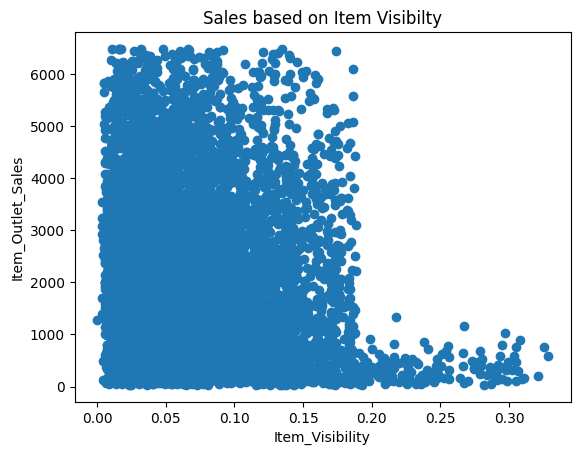

In [102]:
# ScatterPlot for Sales per Item_Visibilty
plt.scatter(data['Item_Visibility'], data['Item_Outlet_Sales'])
plt.title('Sales based on Item Visibilty')
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.show()

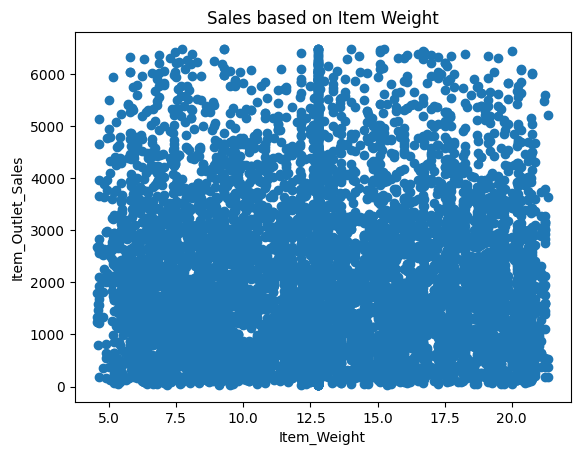

In [103]:
# ScatterPlot for Sales per Item_Weight
plt.scatter(data['Item_Weight'], data['Item_Outlet_Sales'])
plt.title('Sales based on Item Weight')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.show()

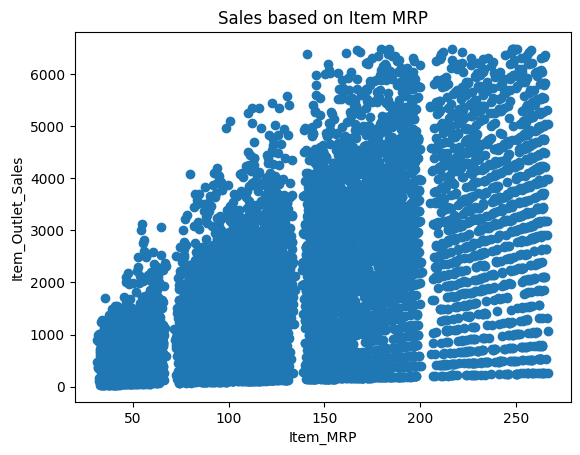

In [104]:
# ScatterPlot for Sales per Item_MRP
plt.scatter(data['Item_MRP'], data['Item_Outlet_Sales'])
plt.title('Sales based on Item MRP')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

* ### Bivariate plots For Categorical.
> Let's check following relationships

* **Sales per Item_Type_Combined**
* **Sales per Outlet_Identifier**
* **Sales per Outlet_Type**
* **Sales per Outlet_Size**
* **Sales per Outlet_Location_Type**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


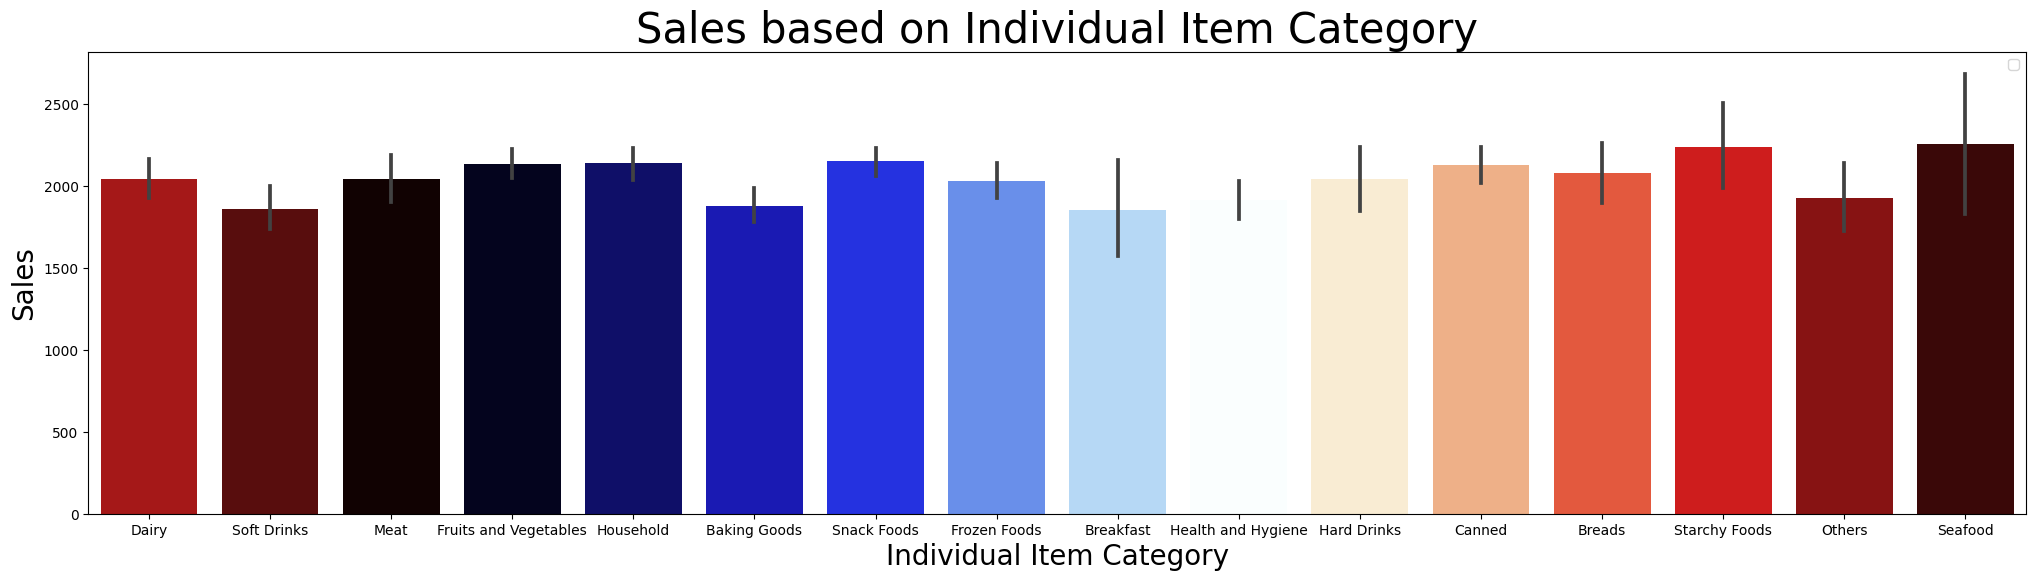

In [105]:
# BarPlot for Sales per Item_Type
plt.figure(figsize=(25,6))
sns.barplot(data=data,x='Item_Type', y='Item_Outlet_Sales', palette='flag')
plt.title('Sales based on Individual Item Category', fontsize=30)
plt.xlabel('Individual Item Category', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


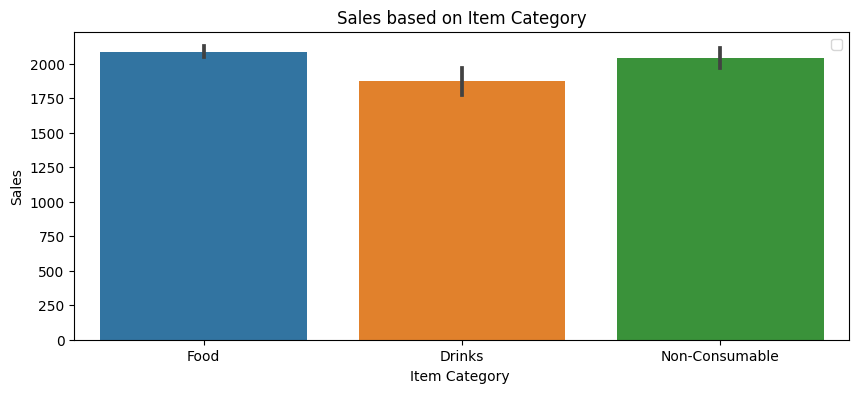

In [106]:
# BarPlot for Sales per Item_Type_Combined
plt.figure(figsize=(10,4))
sns.barplot(data=data,x='Item_Type_Combined', y='Item_Outlet_Sales')
plt.title('Sales based on Item Category')
plt.xlabel('Item Category ')
plt.ylabel('Sales')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


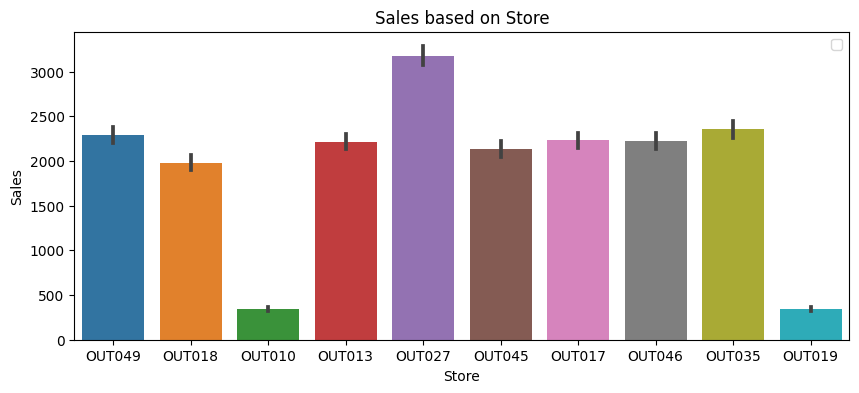

In [107]:
# BarPlot for Sales per Outlet_Identifier
plt.figure(figsize=(10,4))
sns.barplot(data=data,x='Outlet_Identifier', y='Item_Outlet_Sales')
plt.title('Sales based on Store')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


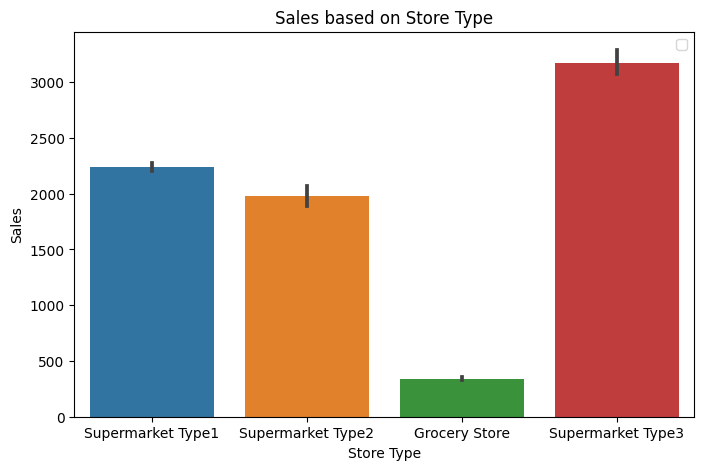

In [108]:
# BarPlot for Sales per Outlet_Type
plt.figure(figsize=(8,5))
sns.barplot(data=data,x='Outlet_Type', y='Item_Outlet_Sales')
plt.title('Sales based on Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


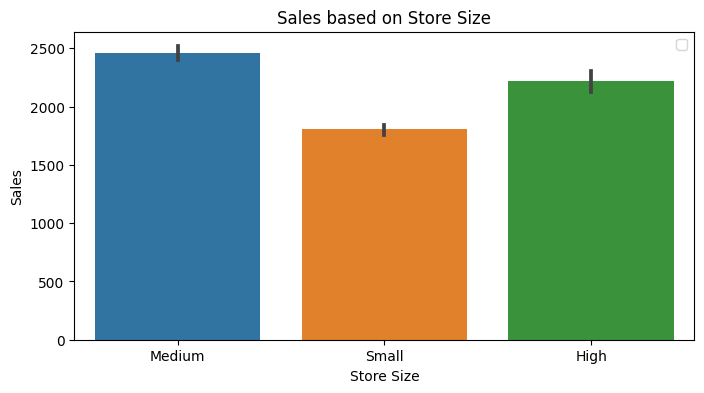

In [109]:
# BarPlot for Sales per Outlet_Size
plt.figure(figsize=(8,4))
sns.barplot(data=data,x='Outlet_Size', y='Item_Outlet_Sales')
plt.title('Sales based on Store Size')
plt.xlabel('Store Size')
plt.ylabel('Sales')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


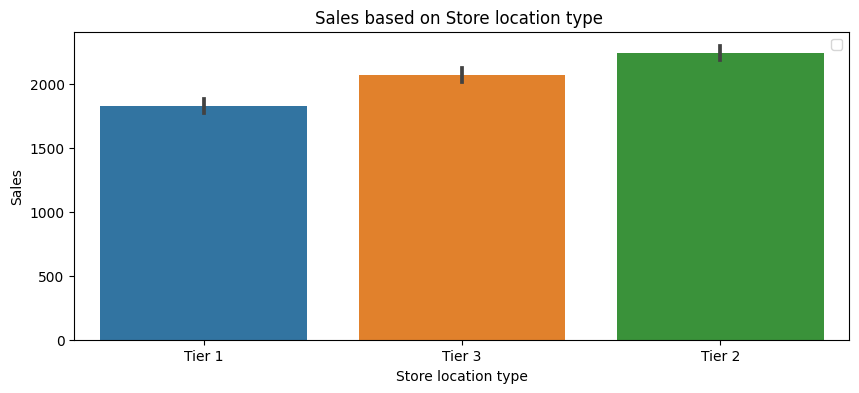

In [110]:
# BarPlot for Sales per Outlet_Location_Type
plt.figure(figsize=(10,4))
sns.barplot(data=data,x='Outlet_Location_Type', y='Item_Outlet_Sales')
plt.title('Sales based on Store location type ')
plt.xlabel('Store location type')
plt.ylabel('Sales')
plt.legend()
plt.show()

## Multivariate plots.
Numerical vs. Numerical
1. Scatterplot
2. Line plot
3. Heatmap for correlation
4. Joint plot

Categorical vs. Numerical
1. Bar chart
2. Voilin plot
3. Categorical box plot
4.Swarm plot

Two Categorcal Variables
1. Bar chart
2. Grouped bar chart
3. Point plot

> Let's check following data
* **Outlet Type in all Outlet location based on sales.**
* **Sales of Item_Type based on Outlet_Type.**
* **Outlet_Location_Type of Outlet_Type based on sales.**
* **Sales of Outlet_Location_Type based on Item_Type_Combined.**

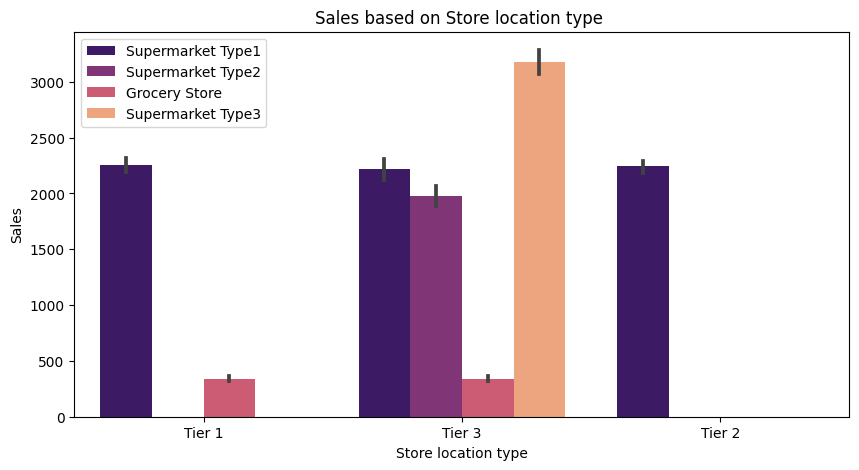

In [111]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='Outlet_Location_Type', y='Item_Outlet_Sales',hue='Outlet_Type',palette='magma')
plt.title('Sales based on Store location type ')
plt.xlabel('Store location type')
plt.ylabel('Sales')
plt.legend()
plt.show()

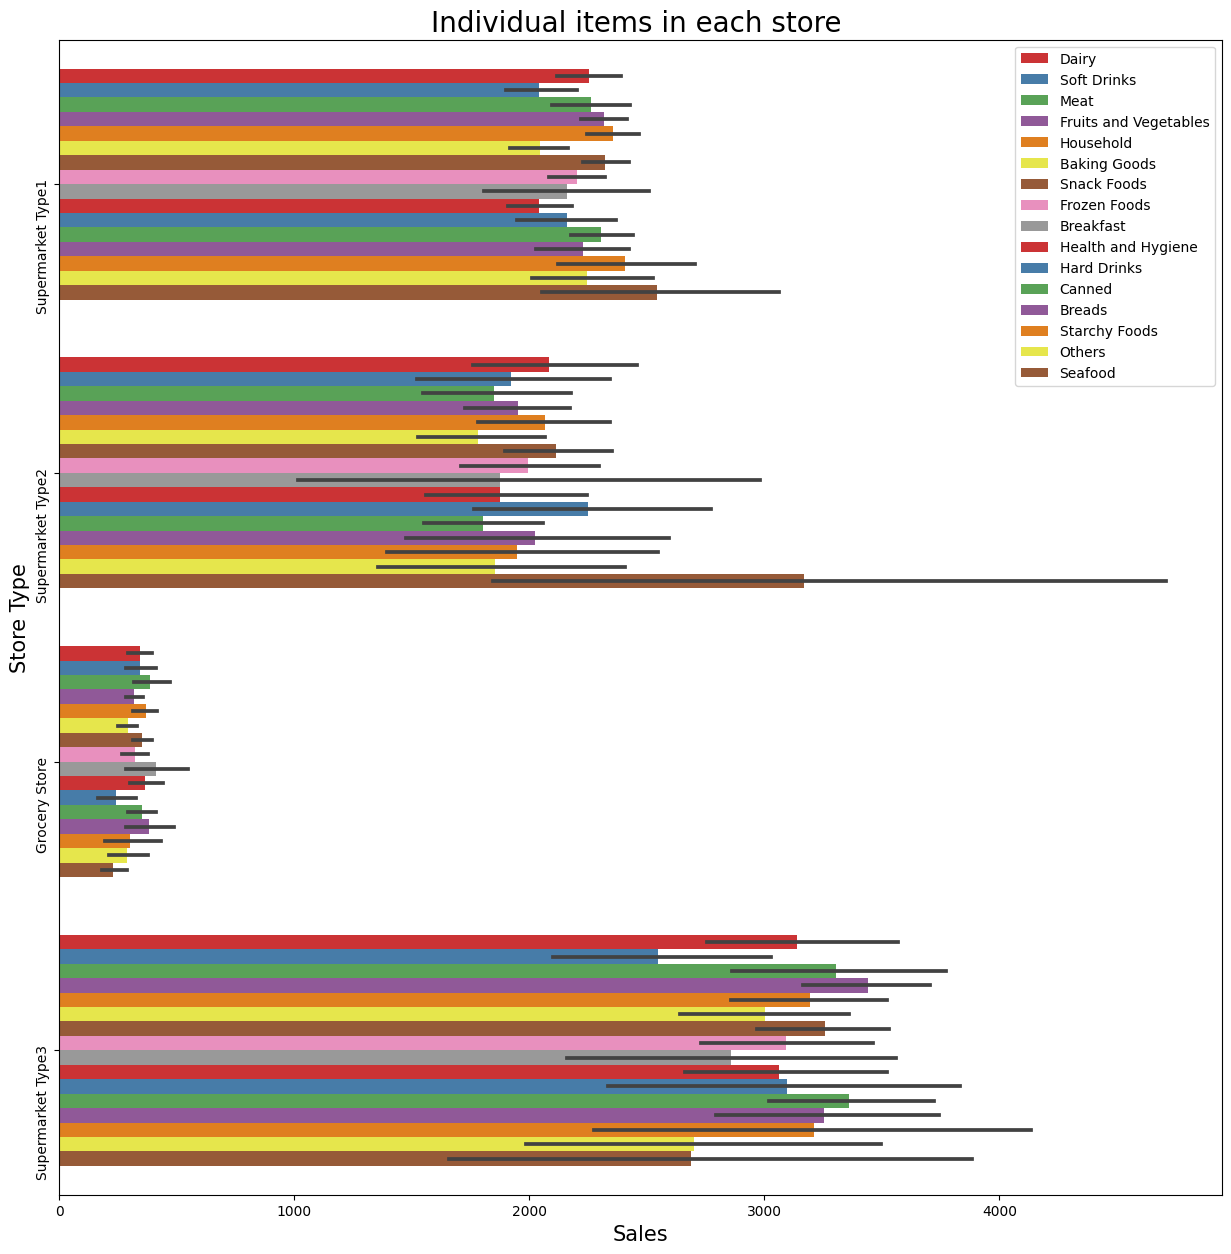

In [112]:
plt.figure(figsize=(15,15))
sns.barplot(data=data,x='Item_Outlet_Sales', y='Outlet_Type',hue='Item_Type',palette='Set1')
plt.title('Individual items in each store ', fontsize=20)
plt.xlabel('Sales', fontsize=15)
plt.ylabel('Store Type', fontsize=15)
plt.yticks(rotation=90)
plt.legend()
plt.show()

In [113]:
# plt.figure(figsize=(10,5))
# sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=data,palette='magma')
# plt.legend()

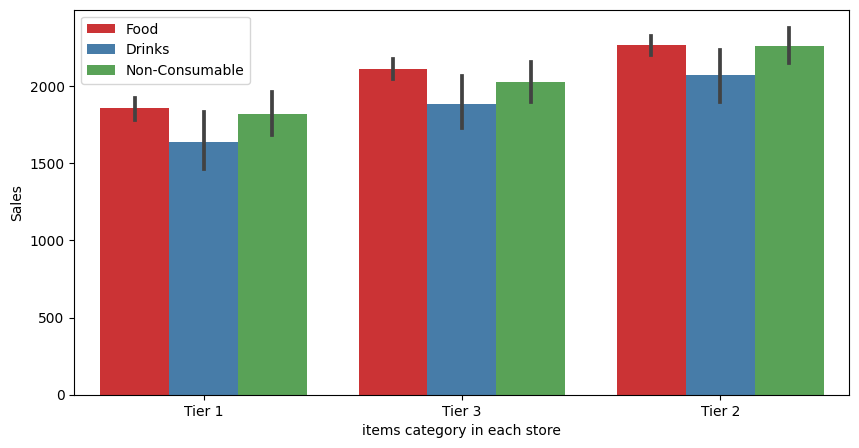

In [114]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Item_Type_Combined',palette='Set1')
plt.xlabel('items category in each store', fontsize=10)
plt.ylabel('Sales', fontsize=10)
plt.legend()
plt.show()

In [115]:
# plt.figure(figsize=(10,5))
# sns.barplot('Outlet_Type','Item_Outlet_Sales',hue='Outlet_Location_Type',data=data,palette='magma')
# plt.legend()

### Correlation Matrix

<AxesSubplot: >

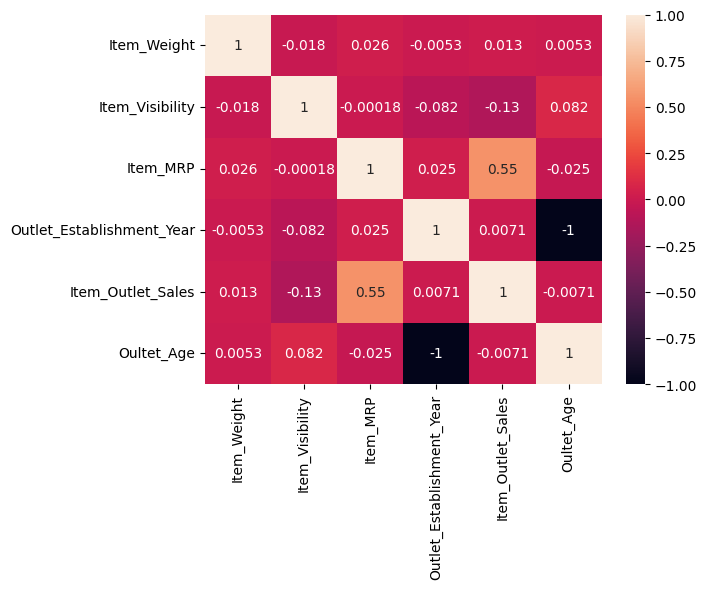

In [116]:
# Correlation Matrix
plt.Figure(figsize=(20,5))
sns.heatmap(data.corr(), annot=True)

* We can see **Item_Outlet_Sales** is highly correlated with **Item_MRP**
* We can see **Outlet_Age** and **Item_Visibility** are negativaly correlated we need to drop them

### Feature Engneering

In [117]:
#Label Encoding for Ordinal Data
le = LabelEncoder()
label = ['Item_Fat_Content', 'Outlet_Type', 'Outlet_Location_Type', 'Outlet_Size']
for i in label:
    data[i] = le.fit_transform(data[i])
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Oultet_Age
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,Food,14
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,Drinks,4
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,Food,14
3,FDX07,19.20,1,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,2,2,0,732.3800,train,Food,15
4,NCD19,8.93,0,0.008082,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,Non-Consumable,26


In [118]:
# One-Hot encoding (OHE) for Nominal Data

# Columns for applying One-Hot encoding
cols = ['Item_Type_Combined']
# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
data_oh = pd.DataFrame(OH_encoder.fit_transform(data[cols])).astype('int64')

# get feature columns
data_oh.columns = OH_encoder.get_feature_names_out(cols)
# # # One-hot encoding removed index; put it back
data_oh.index = data.index

# # # Add one-hot encoded columns to our main df new name: tr_fe, te_fe (means feature engeenired) 
data_fe = pd.concat([data, data_oh], axis=1)
data_fe.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Oultet_Age,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,Food,14,0,1,0
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,Drinks,4,1,0,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,Food,14,0,1,0
3,FDX07,19.20,1,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,2,2,0,732.3800,train,Food,15,0,1,0
4,NCD19,8.93,0,0.008082,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,Non-Consumable,26,0,0,1


In [119]:
data_fe.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Oultet_Age,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,Food,14,0,1,0
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,Drinks,4,1,0,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,Food,14,0,1,0
3,FDX07,19.20,1,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,2,2,0,732.3800,train,Food,15,0,1,0
4,NCD19,8.93,0,0.008082,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,Non-Consumable,26,0,0,1


In [120]:
# Drop irrlevent Columns
data_fe = data_fe.drop(['Item_Identifier','Item_Type_Combined', 'Outlet_Identifier','Oultet_Age',
                     'Item_Fat_Content','Item_Visibility', 'Item_Type','Item_Type_Combined',
                     'Outlet_Establishment_Year','Item_Type'], axis=1)
data_fe.head()

# Divide Data into train and test
train = data_fe.loc[data_fe['source']=="train"]
test = data_fe.loc[data_fe['source']=="test"]

train = train.drop('source', axis=1)
test = test.drop(['source',  'Item_Outlet_Sales'], axis=1)
# Check Datasets
print('\nTrain Dataset for Model Buidling: \n')
print(train.info(verbose=True, show_counts=True))
print('\nTest Dataset for Model Buidling: \n')
print(test.info(verbose=True, show_counts=True)) 
train.head()


Train Dataset for Model Buidling: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8337 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Item_Weight                        8337 non-null   float64
 1   Item_MRP                           8337 non-null   float64
 2   Outlet_Size                        8337 non-null   int32  
 3   Outlet_Location_Type               8337 non-null   int32  
 4   Outlet_Type                        8337 non-null   int32  
 5   Item_Outlet_Sales                  8337 non-null   float64
 6   Item_Type_Combined_Drinks          8337 non-null   int64  
 7   Item_Type_Combined_Food            8337 non-null   int64  
 8   Item_Type_Combined_Non-Consumable  8337 non-null   int64  
dtypes: float64(3), int32(3), int64(3)
memory usage: 553.6 KB
None

Test Dataset for Model Buidling: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 

,Item_Weight,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,9.30,249.8092,1,0,1,3735.1380,0,1,0
1,5.92,48.2692,1,2,2,443.4228,1,0,0
2,17.50,141.6180,1,0,1,2097.2700,0,1,0
3,19.20,182.0950,2,2,0,732.3800,0,1,0
4,8.93,53.8614,0,2,1,994.7052,0,0,1


### Regression Models

1. Linear Regression
2. Random Forest
4. XGBoost Regressor

In [121]:
# Train and Test split
y = train['Item_Outlet_Sales']
X = train.drop('Item_Outlet_Sales', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# Cross Validation Score after model completion
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

(6252, 8) (2085, 8) (6252,) (2085,)


In [122]:
def rmsle(y,y_):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))
def scores(y, y_):
    print('r square  ', metrics.r2_score(y, y_))
    print('Adjusted r square:{}'.format(1 - (1-metrics.r2_score(y, y_))*(len(y)-1)/(len(y)-X_train.shape[1]-1)))
    print('MAPE:{}'.format(np.mean(np.abs((y - y_) / y))*100))
    print('MSE:', metrics.mean_squared_error(y, y_))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_))) 
def test_scores(model):
    print('####################### Training Data Score ######################')
    print()
    #Predicting result on Training data
    y_pred = model.predict(X_train)
    scores(y_train,y_pred)
    print('RMSLE:',rmsle(y_train,y_pred))
    print()
    print('####################### Testing Data Score ######################')
    print()
    # Evaluating on Test Set
    y_pred = model.predict(X_test)
    scores(y_test,y_pred)
    print('RMSLE:',rmsle(y_test,y_pred))
    
    #Comparison Dataframe
    model_eval = pd.DataFrame({'predicted':y_pred, 'actual': y_test})
    print(model_eval.head())
    #Scatter plot of Actual vs Predicted
    ax = sns.lmplot(x="predicted", y="actual", data=model_eval)

### Linear Regression

In [123]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {'copy_X':[True, False],
          'fit_intercept':[True,False]}
# Instantiate a Decision reg classifier: reg
reg = LinearRegression()

# Instantiate the gridSearchCV object: reg_cv
reg_cv = GridSearchCV(reg, param_dist, cv=5,scoring='r2')

# Fit it to the data
reg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision reg Parameters: {}".format(reg_cv.best_params_))
print("Best score is {}".format(reg_cv.best_score_))

Tuned Decision reg Parameters: {'copy_X': True, 'fit_intercept': True}
Best score is 0.47899484995429764


R^2: 0.4719423747159296
Root Mean Squared Error: 1083.1360418388856
####################### Training Data Score ######################

r square   0.48090675196959487
Adjusted r square:0.4802415676056283
MAPE:95.42461133677742
MSE: 1184954.0280552895
RMSE: 1088.555937035525
RMSLE: 0.9447089217824071

####################### Testing Data Score ######################

r square   0.4719423747159296
Adjusted r square:0.469907470572253
MAPE:94.43020078566806
MSE: 1173183.685130408
RMSE: 1083.1360418388856
RMSLE: 1.0177124068682273
        predicted     actual
6870  1376.711734  3235.7880
3802  2365.231561  2889.5720
2466  3360.651027  1800.3232
4167  1695.178901   508.6712
1702  2234.182129  5326.4000


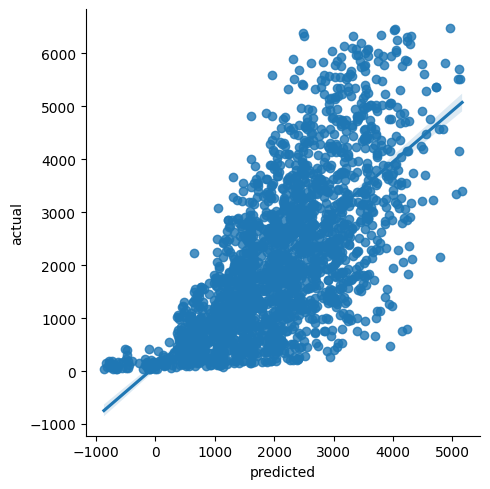

In [124]:
# Create the regressor: reg_all
reg_all = LinearRegression(copy_X= True, fit_intercept=True)

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))
test_scores(reg_all)

# Compute and print the coefficients
# df_linear_coeff = pd.DataFrame(zip(df.columns, reg_all.coef_.tolist()), columns=['Names', 'Coefficients'])
# print(df_linear_coeff)

In [125]:
from sklearn.model_selection import cross_val_score
# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg,X,y,cv=5,scoring='neg_mean_squared_error')

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[-1219572.55622783 -1140111.00554645 -1166295.31210888 -1188600.33429822
 -1204577.39904158]
Average 5-Fold CV Score: -1183831.3214445924


### Ridge Regression

In [126]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {'alpha':np.logspace(-4, 0, 50),
         #  'normalize':[True,False],
             'max_iter':range(500,5000,500)}
# Instantiate a Decision ridge classifier: ridge
ridge = Ridge()

# Instantiate the gridSearchCV object: ridge_cv
ridge_cv = GridSearchCV(ridge, param_dist, cv=5,scoring='r2')

# Fit it to the data
ridge_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision ridge Parameters: {}".format(ridge_cv.best_params_))
print("Best score is {}".format(ridge_cv.best_score_))

Tuned Decision ridge Parameters: {'alpha': 1.0, 'max_iter': 500}
Best score is 0.47935555527435963


[   4.45894525  858.78836957 -107.28620442 -262.51170629  670.8098945
   -8.88705711   15.89801307  -11.66797854]
####################### Training Data Score ######################

r square   0.48090675196958943
Adjusted r square:0.48024156760562287
MAPE:95.42460883993755
MSE: 1184954.028055302
RMSE: 1088.5559370355306
RMSLE: 0.9447088315509774

####################### Testing Data Score ######################

r square   0.47194237863525634
Adjusted r square:0.46990747450668313
MAPE:94.4301963539558
MSE: 1173183.6764228542
RMSE: 1083.1360378192826
RMSLE: 1.0177123554068133
        predicted     actual
6870  1376.711835  3235.7880
3802  2365.231483  2889.5720
2466  3360.650861  1800.3232
4167  1695.178932   508.6712
1702  2234.182172  5326.4000


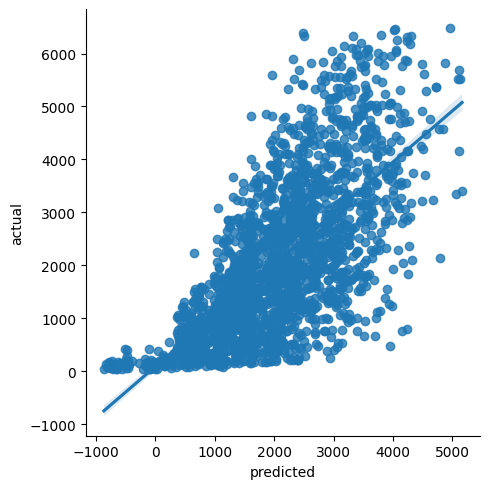

In [127]:
# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.0005428675439323859,max_iter = 500)

# Fit the regressor to the data
ridge.fit(X_train,y_train)

# Compute and print the coefficients
ridge_coef = ridge.coef_
print(ridge_coef)

test_scores(ridge)

### Lasso Regression

In [128]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {'alpha':np.logspace(-4, 0, 50),
        #   'normalize':[True,False],
             'max_iter':range(500,5000,500)}
# Instantiate a Decision lasso classifier: lasso
lasso = Lasso()

# Instantiate the gridSearchCV object: lasso_cv
lasso_cv = GridSearchCV(lasso, param_dist, cv=5,scoring='r2')

# Fit it to the data
lasso_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision lasso Parameters: {}".format(lasso_cv.best_params_))
print("Best score is {}".format(lasso_cv.best_score_))

Tuned Decision lasso Parameters: {'alpha': 1.0, 'max_iter': 500}
Best score is 0.47936978349703285


[   4.45873323  858.78823692 -107.28588432 -262.51127005  670.80966687
   -5.98245967   20.36923645   -7.78774901]
####################### Training Data Score ######################

r square   0.48090675196941757
Adjusted r square:0.4802415676054508
MAPE:95.42459840029903
MSE: 1184954.0280556942
RMSE: 1088.5559370357107
RMSLE: 0.9447087558806385

####################### Testing Data Score ######################

r square   0.4719424136679826
Adjusted r square:0.4699075096744103
MAPE:94.43017488054637
MSE: 1173183.598590775
RMSE: 1083.1360018902403
RMSLE: 1.0177123053181254
        predicted     actual
6870  1376.712462  3235.7880
3802  2365.230744  2889.5720
2466  3360.650228  1800.3232
4167  1695.179381   508.6712
1702  2234.182107  5326.4000


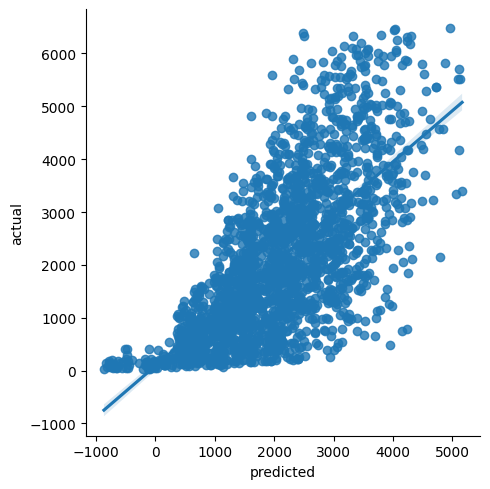

In [129]:
# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.00021209508879201905,max_iter = 500)

# Fit the regressor to the data
lasso.fit(X_train,y_train)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

test_scores(lasso)

### Random Forest Regression

In [130]:
# Create the random grid
random_grid = {'n_estimators': range(100,500,100),
               'max_depth': range(5,20,1),
               'min_samples_leaf':range(2,5,1),
              'max_features':['auto','sqrt','log2'],
              'bootstrap': [True, False],
              'min_samples_split': range(2,5,1)}
# Instantiate a Decision Forest classifier: Forest
Forest = RandomForestRegressor()

# Instantiate the gridSearchCV object: Forest_cv
Forest_cv = RandomizedSearchCV(Forest, random_grid, cv=5)

# Fit it to the data
Forest_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(Forest_cv.best_params_))
print("Best score is {}".format(Forest_cv.best_score_))

Tuned Random Forest Parameters: {'n_estimators': 300, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 7, 'bootstrap': True}
Best score is 0.5884826999151788


[0.02648906 0.54025358 0.00289219 0.00445977 0.4191728  0.00194742
 0.00303638 0.00174879]
####################### Training Data Score ######################

r square   0.6538435767171733
Adjusted r square:0.6533999996890998
MAPE:48.77555257653706
MSE: 790184.5182200707
RMSE: 888.9232352796673
RMSLE: 0.4887903939366141

####################### Testing Data Score ######################

r square   0.5752834985048515
Adjusted r square:0.5736468260520764
MAPE:53.56005916365597
MSE: 943591.0902559668
RMSE: 971.3861694794541
RMSLE: 0.527590819404972
        predicted     actual
6870  1695.225767  3235.7880
3802  2410.741111  2889.5720
2466  3753.636221  1800.3232
4167  1868.750824   508.6712
1702  2599.937644  5326.4000


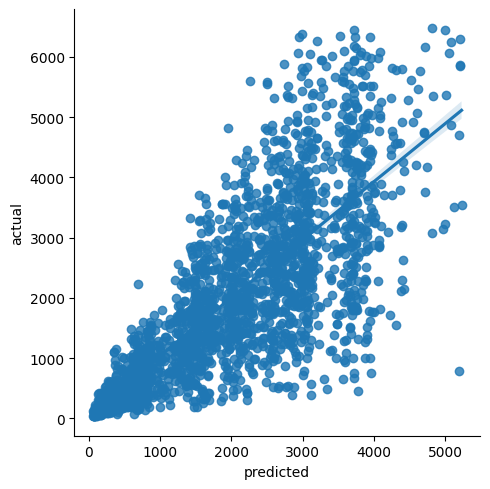

In [131]:
# Instantiate a Forest regressor: Forest
Forest = RandomForestRegressor(n_estimators=100, min_samples_split= 2, min_samples_leaf=4, \
                               max_features='auto', max_depth=9, bootstrap=True)

# Fit the regressor to the data
Forest.fit(X_train,y_train)

# Compute and print the coefficients
Forest_features = Forest.feature_importances_
print(Forest_features)

test_scores(Forest)

In [132]:
from sklearn.model_selection import cross_val_score
# Create a random forest regression object: Forest
Forest = RandomForestRegressor(n_estimators=400, min_samples_split= 2, min_samples_leaf=4, \
                               max_features='auto', max_depth=12, bootstrap=True)

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(Forest,X,y,cv=5,scoring='neg_mean_squared_error')

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[-1000846.19026837  -991960.22798104  -983133.2506566   -963923.66005056
  -985135.38959649]
Average 5-Fold CV Score: -984999.7437106122


### Improving accuracy using XGBOOST

* Improve Accuracy a) Algorithm Tuning b) Ensembles

In [133]:
data_dmatrix = xgb.DMatrix(data=X,label=y)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

In [134]:
dtrain,dtest,data_dmatrix

(<xgboost.core.DMatrix at 0x1d3ebddf650>,
 <xgboost.core.DMatrix at 0x1d3eb1c5310>)

In [135]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5, num_boost_round=50, \
                    early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
cv_results.head()

[12:55:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:55:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:55:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:55:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[12:55:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscal

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,2386.731199,13.945162,2386.082636,61.175896
1,2236.990456,18.696092,2237.403117,59.135072
2,2092.074527,20.371845,2092.226397,59.159779
3,1968.236420,18.674111,1969.863570,63.931723
4,1867.920889,13.266070,1870.388032,75.927960


In [136]:
# the final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

49    1031.236735
Name: test-rmse-mean, dtype: float64


####################### Training Data Score ######################

r square   0.7980466963787112
Adjusted r square:0.7977879063051936
MAPE:40.496714610094955
MSE: 461006.5369047184
RMSE: 678.9746216941531
RMSLE: 0.49335120931268267

####################### Testing Data Score ######################

r square   0.5308751173265802
Adjusted r square:0.5290673143104977
MAPE:57.40813066743178
MSE: 1042253.0274893763
RMSE: 1020.9079427104955
RMSLE: 0.7481558576416449
        predicted     actual
6870  1589.993896  3235.7880
3802  1673.987427  2889.5720
2466  4127.908203  1800.3232
4167  1317.978882   508.6712
1702  2427.304199  5326.4000


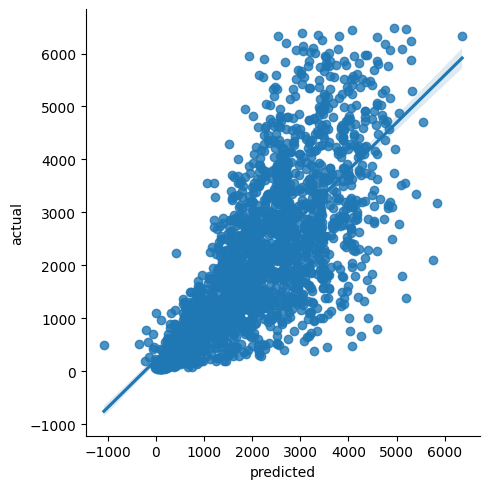

In [137]:
Xgb = XGBRegressor()
Xgb.fit(X_train,y_train)
# pred_xgb = model_xgb.predict(X_test)
test_scores(Xgb)

In [138]:
# Create the random grid
para = {'n_estimators': range(100,500,100),
               'max_depth': range(3,10,1),
        'reg_alpha':np.logspace(-4, 0, 50),
        'subsample': np.arange(0.1,1,0.2),
        'colsample_bytree': np.arange(0.1,1,0.2),
        'colsample_bylevel': np.arange(0.1,1,0.2),
        'colsample_bynode': np.arange(0.1,1,0.2),
       'learning_rate': np.arange(.05, 1, .05)}
# Instantiate a Decision Forest classifier: Forest
Xgb = XGBRegressor()

# Instantiate the gridSearchCV object: Forest_cv
xgb_cv = RandomizedSearchCV(Xgb, para, cv=5)

# Fit it to the data
xgb_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Xgboost Parameters: {}".format(xgb_cv.best_params_))
print("Best score is {}".format(xgb_cv.best_score_))

Tuned Xgboost Parameters: {'subsample': 0.1, 'reg_alpha': 0.0013894954943731374, 'n_estimators': 400, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.9000000000000001, 'colsample_bynode': 0.30000000000000004, 'colsample_bylevel': 0.30000000000000004}
Best score is 0.5789681642212281


[0.08645451 0.39051715 0.0720576  0.06075207 0.30273142 0.02663289
 0.03145293 0.02940146]
####################### Training Data Score ######################

r square   0.5997705883206492
Adjusted r square:0.5992577202614734
MAPE:65.84169249420663
MSE: 913618.9987350148
RMSE: 955.8341899801528
RMSLE: 0.9571825918685934

####################### Testing Data Score ######################

r square   0.5766760578307277
Adjusted r square:0.5750447516952006
MAPE:67.00300253175443
MSE: 940497.2463202497
RMSE: 969.7923727892737
RMSLE: 1.0112049016071678
        predicted     actual
6870  1602.809448  3235.7880
3802  2217.933838  2889.5720
2466  3433.280273  1800.3232
4167  2076.344727   508.6712
1702  2619.884033  5326.4000


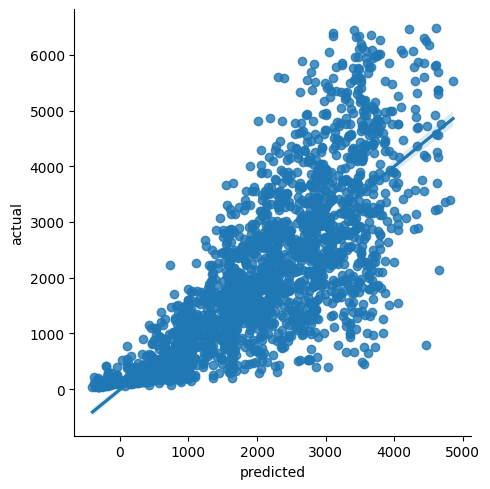

In [139]:
# Instantiate a xgb regressor: xgb
Xgb = XGBRegressor(subsample= 0.1, reg_alpha= 0.08685113737513521, n_estimators= 200, \
                   max_depth= 3, learning_rate=0.05, colsample_bytree= 0.7000000000000001, \
                   colsample_bynode=0.7000000000000001, colsample_bylevel=0.9000000000000001)

# Fit the regressor to the data
Xgb.fit(X_train,y_train)

# Compute and print the coefficients
xgb_features = Xgb.feature_importances_
print(xgb_features)

test_scores(Xgb)

### Finalize model

#### Model Deployment

In [140]:
pickle.dump(Xgb, open('Store_Sales_Prediction_model.pkl', 'wb'))